In [1]:
from dask.distributed import Client, LocalCluster
# from dask_jobqueue import SLURMCluster

# cluster = LocalCluster()
# cluster = SLURMCluster(cores=12, name='test', walltime='00:30:00',
#                        job_extra=['--constraint=HSW24','--exclusive','--nodes=1'], 
#                        memory='118GB', interface='ib0'
#                       ) 
# cluster.scale(12)
# # cluster.adapt(minimum=1, maximum=48)

# client = Client(cluster)
client = Client()
client

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:33994 Dashboard: http://127.0.0.1:45825/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [2]:
import xarray as xr
import numpy as np
import xscale
import gsw
import os.path as op
from xgcm.grid import Grid as xgrid
from xnemogcm import open_domain_cfg, open_nemo
from xhistogram.xarray import histogram as xhist

from matplotlib.gridspec import GridSpec
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02-S/'
xtra = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02X-S'
scratch = '/scratch/cnt0024/hmg2840/tuchida/temp'

In [4]:
g = 9.81
Ce = 0.01
Cp = 4e3
rhoConst = 1e3
ys,ye = (2000-1,2500+1)
xs,xe = (2300-1,3100+1)
zchunk = 4
z10 = 6
ncoars = 5

dsmask = xr.open_dataset(op.join(ddir,'../eNATL60-I/mesh_mask_eNATL60_3.6.nc'), 
                         chunks={'z':zchunk}).isel(t=0)
dsmask

<xarray.Dataset>
Dimensions:       (x: 8354, y: 4729, z: 300)
Dimensions without coordinates: x, y, z
Data variables:
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    time_counter  float64 dask.array<chunksize=(), meta=np.ndarray>
    tmask         (z, y, x) int8 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    umask         (z, y, x) int8 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    vmask         (z, y, x) int8 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    fmask         (z, y, x) int8 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    tmaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    umaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    vmaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    fmaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamt         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamu         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamv         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamf         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphit         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphiu         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphiv         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphif         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1t           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1u           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1v           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1f           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2t           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2u           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2v           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2f           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    ff            (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    mbathy        (y, x) int16 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    misf          (y, x) int16 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    isfdraft      (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e3t_0         (z, y, x) float64 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    e3u_0         (z, y, x) float64 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    e3v_0         (z, y, x) float64 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    e3w_0         (z, y, x) float64 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    gdept_0       (z, y, x) float32 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    gdepu         (z, y, x) float32 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    gdepv         (z, y, x) float32 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    gdepw_0       (z, y, x) float32 dask.array<chunksize=(4, 4729, 8354), meta=np.ndarray>
    gdept_1d      (z) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    gdepw_1d      (z) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    e3t_1d        (z) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    e3w_1d        (z) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  13/07/2018 22:32:53 +0200

In [5]:
f = xr.apply_ufunc(gsw.f, dsmask.nav_lat.sel(y=slice(ys,ye),x=slice(xs,xe)),
                  dask='parallelized', output_dtypes=['float',])
f

<xarray.DataArray 'nav_lat' (y: 502, x: 802)>
dask.array<f, shape=(502, 802), dtype=float64, chunksize=(502, 802), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [6]:
At = (dsmask.e1t * dsmask.e2t).sel(y=slice(ys,ye),x=slice(xs,xe))
Au = (dsmask.e1u * dsmask.e2u).sel(y=slice(ys,ye),x=slice(xs,xe))
Av = (dsmask.e1v * dsmask.e2v).sel(y=slice(ys,ye),x=slice(xs,xe))
A = (dsmask.e1u * dsmask.e2v).sel(y=slice(ys,ye),x=slice(xs,xe))
# e1u = dsmask.e1u[0].sel(y=slice(ys,ye),x=slice(xs,xe))
# e2u = dsmask.e2u[0].sel(y=slice(ys,ye),x=slice(xs,xe))
# e1v = dsmask.e1v[0].sel(y=slice(ys,ye),x=slice(xs,xe))
# e2v = dsmask.e2v[0].sel(y=slice(ys,ye),x=slice(xs,xe))
e2t = dsmask.e2t.sel(y=slice(ys,ye),x=slice(xs,xe))
e1t = dsmask.e1t.sel(y=slice(ys,ye),x=slice(xs,xe))
e2v = dsmask.e2v.sel(y=slice(ys,ye),x=slice(xs,xe))
e1u = dsmask.e1u.sel(y=slice(ys,ye),x=slice(xs,xe))
e2u = dsmask.e2u.sel(y=slice(ys,ye),x=slice(xs,xe))
e1v = dsmask.e1v.sel(y=slice(ys,ye),x=slice(xs,xe))
gdepw = xr.open_dataset(op.join(scratch,'gdepw_eNATL60.nc')
                       ).gdepw.sel(y=slice(ys,ye),x=slice(xs,xe))
# e3t = dsmask.e3t_1d[0]
# e3w = dsmask.e3w_1d[0]

In [7]:
e1tb = e1t.coarsen({'y':5,'x':5},boundary='trim').sum()
e2tb = e2t.coarsen({'y':5,'x':5},boundary='trim').sum()
e1ub = e1u.coarsen({'y':5,'x':5},boundary='trim').sum()
e2vb = e2v.coarsen({'y':5,'x':5},boundary='trim').sum()
Aub = Au.coarsen({'y':5,'x':5}, boundary='trim').sum()
Avb = Av.coarsen({'y':5,'x':5}, boundary='trim').sum()
Atb = At.coarsen({'y':5,'x':5}, boundary='trim').sum()

In [8]:
dsT = xr.open_dataset(op.join(xtra,'00788401-00842400/eNATL60-BLBT02X_1h_20100101_20100125_gridT_20100101-20100101.nc'),
                      chunks={'deptht':zchunk}
                     ).sel(deptht=slice(None,810))
dsS = xr.open_dataset(op.join(xtra,'00788401-00842400/eNATL60-BLBT02X_1h_20100101_20100125_gridS_20100101-20100101.nc'),
                      chunks={'deptht':zchunk}
                     ).sel(deptht=slice(None,810))
dsW = xr.open_dataset(op.join(xtra,'00788401-00842400/eNATL60-BLBT02X_1h_20100101_20100125_gridW_20100101-20100101.nc'),
                      chunks={'depthw':zchunk}
                     ).sel(depthw=slice(None,810))
d2D = xr.open_dataset(op.join(xtra,'00788401-00842400/eNATL60-BLBT02X_1h_20100101_20100125_gridT-2D_20100101-20100101.nc')
                     )

#         if i == days[0,0]:
maskT = dsmask.tmask.sel(y=slice(ys,ye),x=slice(xs,xe)
                        ).isel(z=slice(None,len(dsT.deptht)))

CT = dsT.votemper[-1].sel(y=slice(ys,ye),x=slice(xs,xe)
                         ).where(xr.DataArray(maskT.data, dims=['deptht','y','x']
                                             ) != 0.)
SA = dsS.vosaline[-1].sel(y=slice(ys,ye),x=slice(xs,xe)
                         ).where(xr.DataArray(maskT.data, dims=['deptht','y','x']
                                             ) != 0.)
ssh = d2D.sossheig[-1].sel(y=slice(ys,ye),x=slice(xs,xe)
                          ).where(xr.DataArray(maskT.data[0], dims=['y','x']
                                              ) != 0.)
s_b = ((SA*At).coarsen({'y':5,'x':5}, boundary='trim').sum()
       / At.coarsen({'y':5,'x':5}, boundary='trim').sum()
      )
t_b = ((CT*At).coarsen({'y':5,'x':5}, boundary='trim').sum()
       / At.coarsen({'y':5,'x':5}, boundary='trim').sum()
      )
    #     del SA, CT

z10 = 6
sig0_b = xr.apply_ufunc(gsw.sigma0, s_b, t_b, 
                        dask='parallelized', output_dtypes=[float,]
                       )
b_b = -g*sig0_b*1e-3
        
e3w = dsmask.e3w_0.sel(y=slice(ys,ye),x=slice(xs,xe)) * (1+ssh*gdepw**-1)
e3t = dsmask.e3t_0.sel(y=slice(ys,ye),x=slice(xs,xe)) * (1+ssh*gdepw**-1)
e3w_b = ((e3w*At).coarsen({'y':5,'x':5},boundary='trim').sum() 
         * At.coarsen({'y':5,'x':5},boundary='trim').sum()**-1
        )
e3t_b = ((e3t*At).coarsen({'y':5,'x':5},boundary='trim').sum() 
         * At.coarsen({'y':5,'x':5},boundary='trim').sum()**-1
        )
lat_b = ((dsmask.nav_lat.sel(y=slice(ys,ye),x=slice(xs,xe))
          * At).coarsen({'y':5,'x':5},boundary='trim').sum() 
         * At.coarsen({'y':5,'x':5},boundary='trim').sum()**-1
        )
f_b = xr.apply_ufunc(gsw.f, lat_b,
                     dask='parallelized', output_dtypes=[float,]
                    )

p = xr.apply_ufunc(gsw.p_from_z, 
                   xr.DataArray(-e3w_b[:len(dsT.deptht)].cumsum('z').data, 
                                dims=['deptht','y','x'],
                                coords={'deptht':dsT.deptht.data}), 
                   lat_b,
                   dask='parallelized', output_dtypes=['float',])
N2, pN2 = gsw.Nsquared(s_b, t_b, p, lat_b)
N2 = xr.DataArray(N2, dims=['depthw','y','x'], coords={'depthw':dsW.depthw[1:].data})

nMLD_b = z10 + np.abs((sig0_b.isel(deptht=slice(z10,None))
                       - sig0_b.isel(deptht=z10)
                      ) - 0.03).argmin(dim='deptht')
#         MLD = (xr.ones_like(sig0_b) * sig0_b.deptht
#               )[{'deptht':nMLD_b.compute()}].compute()
MLD = e3t_b.where(e3t_b.z<=nMLD_b.compute()).sum('z').compute()
# N01 = np.sqrt((N2*xr.DataArray(e3w.data[1:len(N2.depthw)+1],dims='depthw')).where(N2.depthw < MLD01).sum('depthw') * MLD01**-1)
N = (np.sqrt(N2) * xr.DataArray(e3w_b.isel(z=slice(1,len(N2.depthw)+1)),
                                dims=['depthw','y','x'])
    ).where(N2.depthw <= MLD).sum('depthw') * MLD**-1

lamML = (N*MLD*f_b**-1).compute()


bx = (b_b.isel(x=slice(1,None))
      + b_b.isel(x=slice(None,-1)).data
     ) * .5
by = (b_b.isel(y=slice(1,None))
      + b_b.isel(y=slice(None,-1)).data
     ) * .5
dbx = bx.diff(dim='x') * e1ub.isel(x=slice(1,-1))**-1
dby = by.diff(dim='y') * e2vb.isel(y=slice(1,-1))**-1
        
dbx = (dbx.fillna(0.) * xr.DataArray(e3t_b.isel(z=slice(len(dsT.deptht))
                                               ).isel(x=slice(1,-1)).data,
                                     dims=['deptht','y','x'])
      ).where(dbx.deptht <= MLD.isel(x=slice(1,-1))
             ).sum('deptht',skipna=True)
dby = (dby.fillna(0.) * xr.DataArray(e3t_b.isel(z=slice(len(dsT.deptht))
                                               ).isel(y=slice(1,-1)).data,
                                     dims=['deptht','y','x'])
      ).where(dby.deptht <= MLD.isel(y=slice(1,-1))
            ).sum('deptht',skipna=True)

gradB2 = dbx.isel(y=slice(1,-1))**2 + dby.isel(x=slice(1,-1))**2

lamML_h = (np.sqrt(gradB2) * f_b.isel(y=slice(1,-1),x=slice(1,-1))**-2).compute()
print(lamML_h, lamML)

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


<xarray.DataArray (y: 98, x: 158)>
array([[278.92882843,  71.18676119, 144.19892717, ...,  42.62877451,
         51.87647655,  33.96898517],
       [311.16747202,  47.52960247, 157.40888434, ...,  91.75960777,
         50.07771023,  57.24326227],
       [273.3317174 ,  59.91299402, 198.03190187, ...,  35.52525484,
         37.25338392,  90.16366556],
       ...,
       [196.2569762 , 110.52350773,  53.71243025, ...,  31.28598512,
         70.56313936, 178.37191539],
       [143.31697405, 157.24897244, 105.39111752, ...,  74.37104402,
         48.13130913,  25.87300176],
       [109.86395961, 132.86021477, 199.52395049, ...,  51.17357148,
         53.73369696,  49.99391243]])
Coordinates:
    time_counter   datetime64[ns] 2010-01-01T23:30:00
    time_centered  datetime64[ns] 2010-01-01T23:30:00
Dimensions without coordinates: y, x <xarray.DataArray (y: 100, x: 160)>
array([[1609.9654659 , 1411.981873  , 1468.53490363, ..., 1345.37508688,
        1436.70268268, 1616.47485928],
       [15

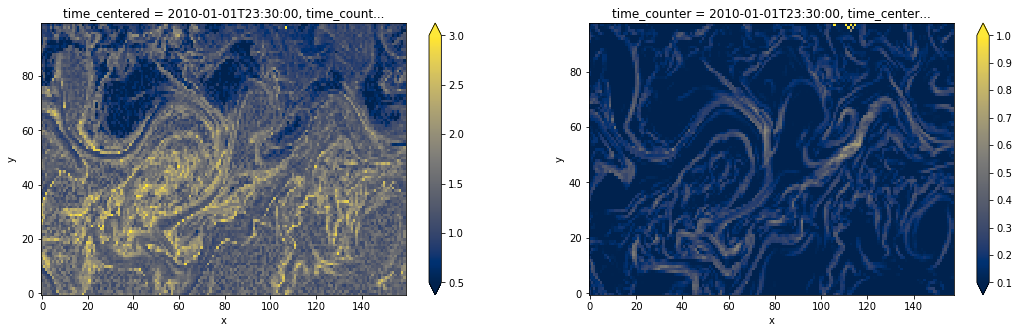

In [31]:
fig, (ax1,ax2) = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
(lamML*1e-3).plot(ax=ax1, vmax=3., vmin=.5, cmap='cividis')
(lamML_h*1e-3).plot(ax=ax2, vmax=1., vmin=.1, cmap='cividis')

In [23]:
boost = (np.sqrt(Atb.isel(y=slice(1,-1),x=slice(1,-1))) 
         * np.maximum(np.maximum(lamML.isel(y=slice(1,-1),x=slice(1,-1)), 
                                 lamML_h),
                      1e3)**-1)
boost

<xarray.DataArray (y: 98, x: 158)>
dask.array<mul, shape=(98, 158), dtype=float64, chunksize=(98, 158), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 36.787834 36.788864 ... 43.1277 43.129498
    nav_lon        (y, x) float32 -59.50833 -59.42493 ... -46.64605 -46.56201
    time_centered  datetime64[ns] 2010-01-01T23:30:00
    time_counter   datetime64[ns] 2010-01-01T23:30:00
Dimensions without coordinates: y, x

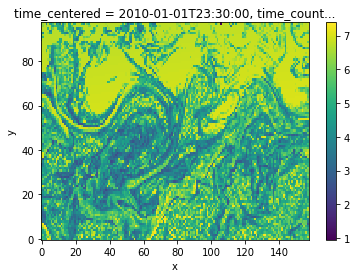

In [36]:
boost.plot()

In [24]:
wsbsb_bar = xr.open_mfdataset(op.join(scratch,'GulfStream/wsbsb-bar_ML-24h_2010-01-01_01-25.nc'), 
                              concat_dim='time_counter', combine='by_coords'
                             ).wb

BFK_bar = xr.open_mfdataset(op.join(scratch,'GulfStream/BFKML_bar-24h_2010-01-01_01-25.nc'), 
                            concat_dim='time_counter', 
                            combine='by_coords'
                           ).BFK
wsbsb_bar

<xarray.DataArray 'wb' (time_counter: 25, y: 100, x: 160)>
dask.array<open_dataset-f2d51f180683b2fa1ee37b3805a84a50wb, shape=(25, 100, 160), dtype=float64, chunksize=(25, 100, 160), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(100, 160), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(100, 160), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(25,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-01-01T23:30:00 ... 2010-01-25T23:30:00
Dimensions without coordinates: y, x

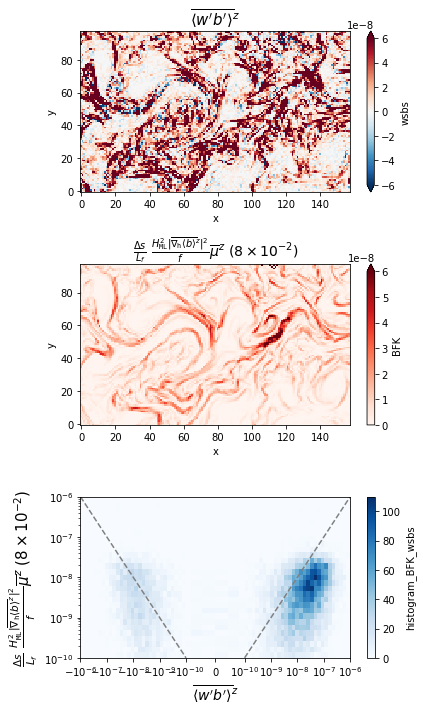

In [27]:
gradbb2H = BFK_bar.sel(time_counter='2010-01-01') * boost
wsbsb_ML = wsbsb_bar.sel(time_counter='2010-01-01')
gradbb2H.name = 'BFK'
wsbsb_ML.name = 'wsbs'

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(6,10),nrows=3,ncols=1)
fig.set_tight_layout(True)
# fig = plt.figure(figsize=(14,9))
# # fig.set_tight_layout(True)
# gs = GridSpec(2,11,figure=fig)
# ax1 = fig.add_subplot(gs[0,:5])
# ax2 = fig.add_subplot(gs[0,6:])
# ax3 = fig.add_subplot(gs[1,1:-1])
wsbsb_ML[0,1:-1,1:-1].plot(ax=ax1, vmax=6e-8, cmap='RdBu_r', rasterized=True)
(8*gradbb2H[0]).plot(ax=ax2, vmin=0., vmax=6e-8, cmap='Reds', rasterized=True)
xhist(8*gradbb2H[0], 
      wsbsb_ML[0,1:-1,1:-1],
      bins=[np.logspace(-10,-6,30), 
            np.concatenate((-np.logspace(-6,-10,30),np.concatenate((np.linspace(-9e-11,9e-11,5),np.logspace(-10,-6,30)))))]
     ).plot(ax=ax3, cmap='Blues')
ax3.plot(np.linspace(1e-10,1e-6), np.linspace(1e-10,1e-6), c='grey', ls='--')
ax3.plot(np.linspace(-1e-6,-1e-10), np.linspace(1e-6,1e-10), c='grey', ls='--')
ax3.set_xscale('symlog', linthreshx=1e-10)
ax3.set_yscale('log')
ax3.set_ylim([1e-10,1e-6])
ax3.set_xlim([-1e-6,1e-6])
ax3.set_xlabel(r"$\overline{\langle w'b'\rangle}^{z}$", fontsize=14)
ax2.set_title(r"$\frac{\Delta s}{L_f}\ \frac{H_{\tt ML}^2|\overline{\nabla_{\tt h}\langle b\rangle}^z|^2}{f} \overline{\mu}^z$"
               + r" ($8\times$10$^{-2}$)", 
               fontsize=14)
ax1.set_title(r"$\overline{\langle w'b'\rangle}^{z}$", fontsize=15)
ax3.set_ylabel(r"$\frac{\Delta s}{L_f}\ \frac{H_{\tt ML}^2|\overline{\nabla_{\tt h}\langle b\rangle}^z|^2}{f} \overline{\mu}^z$"
              + r" ($8\times$10$^{-2}$)", 
             fontsize=15)
# fig.suptitle(r"Jan. 1, 2010", fontsize=17)
plt.savefig('/scratch/cnt0024/hmg2840/tuchida/Figs/wsbsML-boosted_Jan-01-2010_GulfStreamPatch.pdf')

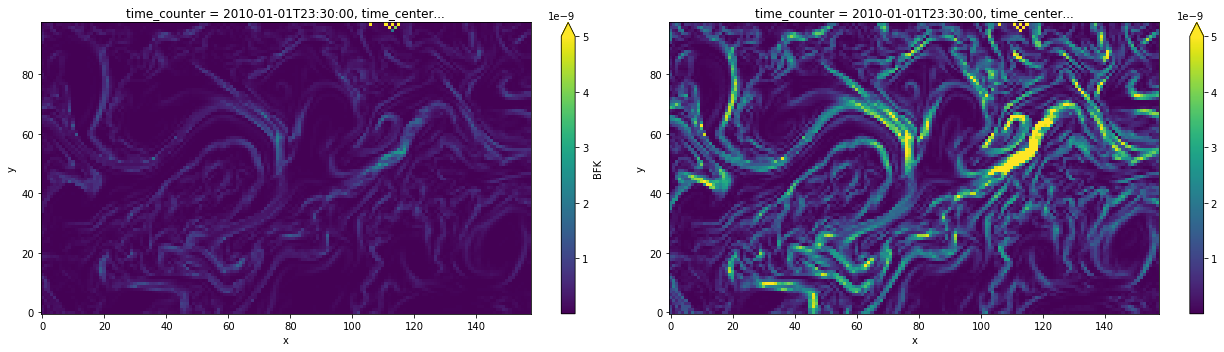

In [21]:
fig, (ax1,ax2) = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
fig.set_tight_layout(True)
BFK_bar.sel(time_counter='2010-01-01').plot(ax=ax1, vmax=5e-9)
(BFK_bar.sel(time_counter='2010-01-01')*boost).plot(ax=ax2, vmax=5e-9)

In [9]:
def filt(da, area=None):
    
    if area is not None:
        win_2D = (da * area).window
    else:
        win_2D = da.window
    
    win_2D.set(window='hanning', cutoff=20, dim=['y','x'], n=[30,30])
    bw = win_2D.boundary_weights(drop_dims=[])
    da_LS = win_2D.convolve(weights=bw)
    
    if area is not None:
        area_win = area.window
        area_win.set(window='hanning', cutoff=20, dim=['y','x'], n=[30,30])
        bw = area_win.boundary_weights(drop_dims=[])
        da_LS *= area_win.convolve(weights=bw)**-1
    
    return da_LS

In [13]:
# dirs = np.arange(669601,756000,43200,dtype=int)
# days = np.concatenate((np.arange(11,31,dtype=int), np.arange(1,6,dtype=int))).reshape((5,5))
days = np.arange(6,31, dtype=int).reshape((5,5))
dirs = np.repeat(np.array([1058401]),days.shape[0]+1)
print(days,dirs)

[[ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]] [1058401 1058401 1058401 1058401 1058401 1058401]


In [14]:
e1tb = e1t.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':ncoars,'x':ncoars},
                                                     boundary='trim').sum(skipna=True)
e2tb = e2t.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':ncoars,'x':ncoars},
                                                     boundary='trim').sum(skipna=True)
e1ub = e1u.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':ncoars,'x':ncoars},
                                                     boundary='trim').sum(skipna=True)
e2vb = e2v.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':ncoars,'x':ncoars},
                                                     boundary='trim').sum(skipna=True)

lat_b = ((dsmask.nav_lat.sel(y=slice(ys,ye),x=slice(xs,xe))
          * At).isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5},boundary='trim').sum() 
         * At.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5},boundary='trim').sum()**-1
        )
f_b = xr.apply_ufunc(gsw.f, lat_b,
                     dask='parallelized', output_dtypes=[float,]
                    )

month = 5
year = 2010
for k in range(0,len(dirs)-1):
    for i in days[k]:
        j = month
        l = j
        m = month+0
#         if k > 0:
#             j = m
        if i < days[0,0]:
            l = m

        dsT = xr.open_dataset(op.join(xtra,'%08d-%08d/eNATL60-BLBT02X_1h_%4d%02d%02d_%4d%02d%02d_gridT_%4d%02d%02d-%4d%02d%02d.nc' 
                                      % (dirs[k],int(dirs[k]+10800*days.shape[0]-1),
                                         year,j,days[0,0],year,m,days[-1,-1],
                                         year,l,i,year,l,i)),
                              chunks={'time_counter':1,'deptht':zchunk}
                             ).sel(deptht=slice(None,810))
        dsS = xr.open_dataset(op.join(xtra,'%08d-%08d/eNATL60-BLBT02X_1h_%4d%02d%02d_%4d%02d%02d_gridS_%4d%02d%02d-%4d%02d%02d.nc' 
                                      % (dirs[k],int(dirs[k]+10800*days.shape[0]-1),
                                         year,j,days[0,0],year,m,days[-1,-1],
                                         year,l,i,year,l,i)),
                              chunks={'time_counter':1,'deptht':zchunk}
                             ).sel(deptht=slice(None,810))
        dsW = xr.open_dataset(op.join(xtra,'%08d-%08d/eNATL60-BLBT02X_1h_%4d%02d%02d_%4d%02d%02d_gridW_%4d%02d%02d-%4d%02d%02d.nc'
                                      % (dirs[k],int(dirs[k]+10800*days.shape[0]-1),
                                         year,j,days[0,0],year,m,days[-1,-1],
                                         year,l,i,year,l,i)),
                      chunks={'depthw':zchunk}
                     ).sel(depthw=slice(None,810))
        d2D = xr.open_dataset(op.join(xtra,'%08d-%08d/eNATL60-BLBT02X_1h_%4d%02d%02d_%4d%02d%02d_gridT-2D_%4d%02d%02d-%4d%02d%02d.nc' 
                                      % (dirs[k],int(dirs[k]+10800*days.shape[0]-1),
                                         year,j,days[0,0],year,m,days[-1,-1],
                                         year,l,i,year,l,i)),
                             )

        if i == days[0,0]:
            maskT = dsmask.tmask.sel(y=slice(ys,ye),x=slice(xs,xe)
                                        ).isel(z=slice(None,len(dsT.deptht)))

        CT = dsT.votemper[-1].sel(y=slice(ys,ye),x=slice(xs,xe)
                                 ).where(xr.DataArray(maskT.data, dims=['deptht','y','x']
                                                     ) != 0.)
        SA = dsS.vosaline[-1].sel(y=slice(ys,ye),x=slice(xs,xe)
                                 ).where(xr.DataArray(maskT.data, dims=['deptht','y','x']
                                                     ) != 0.)
        ssh = d2D.sossheig[-1].sel(y=slice(ys,ye),x=slice(xs,xe)
                                  ).where(xr.DataArray(maskT.data[0], dims=['y','x']
                                                      ) != 0.)
        
        buoy = -g * xr.apply_ufunc(gsw.sigma0, SA, CT, 
                                   dask='parallelized', output_dtypes=[float,]
                                  ) * 1e-3
        bm = filt(buoy.chunk({'deptht':1}), area=At)
    #     del dsT, dsS, dsW


#######################
        s_b = ((SA*At).isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5}, boundary='trim').sum()
               / At.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5}, boundary='trim').sum()
              )
        t_b = ((CT*At).isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5}, boundary='trim').sum()
               / At.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5}, boundary='trim').sum()
              )
    #     del SA, CT

        z10 = 6
        sig0_b = xr.apply_ufunc(gsw.sigma0, s_b, t_b, 
                                dask='parallelized', output_dtypes=[float,]
                               )
        b_b = -g*sig0_b*1e-3
        
        e3w = dsmask.e3w_0.sel(y=slice(ys,ye),x=slice(xs,xe)) * (1+ssh*gdepw**-1)
        e3t = dsmask.e3t_0.sel(y=slice(ys,ye),x=slice(xs,xe)) * (1+ssh*gdepw**-1)
        e3w_b = ((e3w*At).isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5},boundary='trim').sum() 
                 * At.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5},boundary='trim').sum()**-1
                )
        e3t_b = ((e3t*At).isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5},boundary='trim').sum() 
                 * At.isel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':5,'x':5},boundary='trim').sum()**-1
                )
        
        p = xr.apply_ufunc(gsw.p_from_z, 
                           xr.DataArray(-e3w_b[:len(dsT.deptht)].cumsum('z').data, 
                                        dims=['deptht','y','x'],
                                        coords={'deptht':dsT.deptht.data}), 
                           lat_b,
                           dask='parallelized', output_dtypes=['float',])
        N2, pN2 = gsw.Nsquared(s_b, t_b, p, lat_b)
        N2 = xr.DataArray(N2, dims=['depthw','y','x'], coords={'depthw':dsW.depthw[1:].data})

        nMLD_b = z10 + np.abs((sig0_b.isel(deptht=slice(z10,None))
                               - sig0_b.isel(deptht=z10)
                              ) - 0.03).argmin(dim='deptht')
        #         MLD = (xr.ones_like(sig0_b) * sig0_b.deptht
        #               )[{'deptht':nMLD_b.compute()}].compute()
        MLD_b = e3t_b.where(e3t_b.z<=nMLD_b.compute()).sum('z').compute()
#         N01 = np.sqrt((N2*xr.DataArray(e3w.data[1:len(N2.depthw)+1],
#                                        dims='depthw')).where(N2.depthw < MLD01).sum('depthw') 
#                       * MLD01**-1)
        N = (np.sqrt(N2) * xr.DataArray(e3w_b.isel(z=slice(1,len(N2.depthw)+1)),
                                        dims=['depthw','y','x'])
            ).where(N2.depthw <= MLD_b).sum('depthw') * MLD_b**-1

        del nMLD_b, sig0_b
#         if i == days[0,0]:
#             MLD_b = MLD
#         else:
#             MLD_b = xr.concat([MLD_b, MLD], 'time_counter')
        

#######################    
#         bb_ML = ((b_b * xr.DataArray(e3t.data[:len(b_b.deptht)],dims=['deptht'])
#                  ).where(b_b.deptht <= MLD).sum('deptht') 
#                  * MLD**-1)

        bmx = (bm.isel(x=slice(1,None))
               + bm.isel(x=slice(None,-1)).data
              ) * .5
        bmy = (bm.isel(y=slice(1,None))
               + bm.isel(y=slice(None,-1)).data
              ) * .5
        dbmx = bmx.diff(dim='x') * e1u.isel(x=slice(1,-1))**-1
        dbmy = bmy.diff(dim='y') * e2v.isel(y=slice(1,-1))**-1

        dbmx_coar = ((dbmx.isel(y=slice(1,-1))
                      *At.sel(y=slice(1,-1),x=slice(1,-1))).coarsen({'y':ncoars,'x':ncoars},
                                                                    boundary='trim').sum(skipna=True)
                     * At.sel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':ncoars,'x':ncoars},
                                                                   boundary='trim').sum(skipna=True)**-1
                    )
        dbmy_coar = ((dbmy.isel(x=slice(1,-1))
                      *At.sel(y=slice(1,-1),x=slice(1,-1))).coarsen({'y':ncoars,'x':ncoars},
                                                                    boundary='trim').sum(skipna=True)
                     * At.sel(y=slice(1,-1),x=slice(1,-1)).coarsen({'y':ncoars,'x':ncoars},
                                                                   boundary='trim').sum(skipna=True)**-1
                    )
        dbmxH = (dbmx_coar 
                 * xr.DataArray(e3t_b.isel(z=slice(len(dsT.deptht))).data,
                                dims=['deptht','y','x'])
                ).where(dbmx_coar.deptht <= MLD_b).sum('deptht',skipna=True)
        dbmyH = (dbmy_coar 
                 * xr.DataArray(e3t_b.isel(z=slice(len(dsT.deptht))).data,
                                dims=['deptht','y','x'])
                ).where(dbmy_coar.deptht <= MLD_b).sum('deptht',skipna=True)
        

        bx = (b_b.isel(x=slice(1,None))
              + b_b.isel(x=slice(None,-1)).data
             ) * .5
        by = (b_b.isel(y=slice(1,None))
              + b_b.isel(y=slice(None,-1)).data
             ) * .5
        dbx = bx.diff(dim='x') * e1ub.isel(x=slice(1,-1))**-1
        dby = by.diff(dim='y') * e2vb.isel(y=slice(1,-1))**-1
        
        dbxH = (dbx.fillna(0.) * xr.DataArray(e3t_b.isel(z=slice(len(dsT.deptht))).isel(x=slice(1,-1)).data,
                                              dims=['deptht','y','x'])
               ).where(dbx.deptht <= MLD_b.isel(x=slice(1,-1))
                      ).sum('deptht',skipna=True)
        dbyH = (dby.fillna(0.) * xr.DataArray(e3t_b.isel(z=slice(len(dsT.deptht))).isel(y=slice(1,-1)).data,
                                              dims=['deptht','y','x'])
               ).where(dby.deptht <= MLD_b.isel(y=slice(1,-1))
                      ).sum('deptht',skipna=True)
        
        gradBm2 = dbmxH**2 + dbmyH**2
        gradBb2 = dbxH.isel(y=slice(1,-1))**2 + dbyH.isel(x=slice(1,-1))**2
        
#         wsbsb_ML = wsbs_b.where(wsbs_b.depthw <= MLD)
#####################  
        if i == days[0,0]:
            lamML = (N*MLD_b*f_b**-1).compute()
            lamML_m = (np.sqrt(gradBm2) * f_b**-2).compute()
            lamML_b = (np.sqrt(gradBb2) * f_b.isel(y=slice(1,-1),x=slice(1,-1))**-2).compute()

        else:
            lamML = xr.concat([lamML, (N*MLD_b*f_b**-1).compute()],
                               'time_counter')
            lamML_m = xr.concat([lamML_m, (np.sqrt(gradBm2) * f_b**-2).compute()],
                                'time_counter')
            lamML_b = xr.concat([lamML_b, (np.sqrt(gradBb2) 
                                           * f_b.isel(y=slice(1,-1),x=slice(1,-1))**-2).compute()
                                ],
                                'time_counter')


        del MLD_b
        
#         client.restart()
        print(str(l)+'-'+str(i))
    
#     wsbsb_bar.to_netcdf(op.join(scratch,'wsbs_bar_2009-%2d-%02d_%2d-%02d.nc' % (j,days[k,0],l,days[k,-1])))

dsave = lamML.isel(y=slice(1,-1),x=slice(1,-1)).to_dataset(name='lamML')
dsave['lamML_m'] = lamML_m.isel(y=slice(1,-1),x=slice(1,-1))
dsave['lamML_b'] = lamML_b
# dsave['MLD'] = MLD_b
dsave.to_netcdf(op.join(scratch,'GulfStream/MLradius_Ncoars%02d-24h_%4d-%02d-%02d_%02d-%02d.nc' 
                        % (ncoars,year,j,days[0,0],m,days[-1,-1])))
    
#     if k < len(dirs)-2:
#         del BFK_bar

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-6


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-7


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-8


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-9


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-10


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-6f8eabc4c5bdca589c9025362f722f86', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-6f8eabc4c5bdca589c9025362f722f86', 0, 0, 0)
NoneType: None


5-11


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-12


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-13


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-14


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-15


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-16


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-17


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-18


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-19


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-284b1e7f4603c1dba0605f70ac7f9a44', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-284b1e7f4603c1dba0605f70ac7f9a44', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-284b1e7f4603c1dba0605f70ac7f9a44', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-284b1e7f4603c1dba0605f70ac7f9a44', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-284b1e7f4603c1dba0605f70ac7f9a44', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have pro

5-20


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-21


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-22


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-018244fcde33d4831dc979ad66cba5bd', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-018244fcde33d4831dc979ad66cba5bd', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-018244fcde33d4831dc979ad66cba5bd', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-018244fcde33d4831dc979ad66cba5bd', 0, 0, 0)
NoneType: None


5-23


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-14fa56e64b49e23f8ac6cd494dc2ed3f', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-14fa56e64b49e23f8ac6cd494dc2ed3f', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-14fa56e64b49e23f8ac6cd494dc2ed3f', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-14fa56e64b49e23f8ac6cd494dc2ed3f', 0, 0, 0)
NoneType: None


5-24


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-25


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-26


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-8045a76fb7cd535e062ecb25f31b7eaa', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-8045a76fb7cd535e062ecb25f31b7eaa', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-8045a76fb7cd535e062ecb25f31b7eaa', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('truediv-8045a76fb7cd535e062ecb25f31b7eaa', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Couldn't gather keys {"('truediv-8045a76fb7cd535e062ecb25f31b7eaa', 0, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have pro

5-27


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-28


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-29


/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


5-30


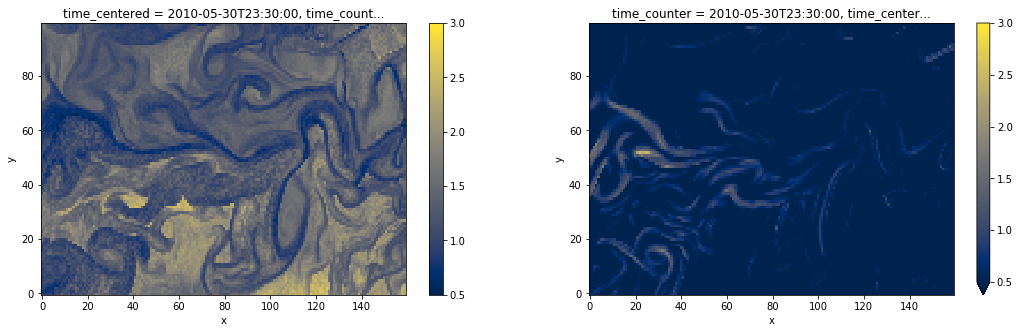

In [15]:
fig, (ax1,ax2) = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
(lamML[-1]*1e-3).plot(ax=ax1, vmax=3., vmin=.5, cmap='cividis')
(lamML_m[-1]*1e-3).plot(ax=ax2, vmax=3., vmin=.5, cmap='cividis')

In [32]:
lamML

<xarray.DataArray (time_counter: 25, y: 100, x: 160)>
array([[[1745.55461558, 1298.15146544, 1293.93614675, ...,
         1419.90265464, 1425.40343111, 1400.98175785],
        [1612.27559753, 1440.94698108, 1390.8238277 , ...,
         1377.18074248, 1425.32619308, 1491.67517008],
        [1484.56719752, 1580.81855819, 1466.28159913, ...,
         1371.97829805, 1096.71929062, 1506.02947811],
        ...,
        [ 888.60155647,  945.44907712, 1075.85076642, ...,
          871.75017427,  319.21329212,  492.85307943],
        [1025.63317592, 1142.10588562, 1041.61668498, ...,
         1021.06260169,  572.51741663,  876.61160694],
        [ 948.6317941 ,  974.36836574,  904.45373002, ...,
          939.97308222,  926.50638839,  698.69473156]],

       [[1317.23659034, 1479.28322133, 1360.63066279, ...,
         1307.83492845, 1304.09480032, 1806.94190999],
        [1321.38579443, 1334.70238457, 1319.65607866, ...,
         1328.09709159, 1111.24305178, 1861.12531141],
        [1370.36734675, 1431.67543176, 1532.47902582, ...,
         1735.33179236, 1751.1019185 , 1391.85927449],
        ...,
        [1650.62967353, 1268.57721578, 1289.66368907, ...,
         1491.26689327,  929.05893464,  801.59484228],
        [1583.7641399 , 1364.6429896 , 1355.47254009, ...,
         1413.24592219, 1621.39533075, 1521.88311316],
        [1732.86991119, 1505.58378235, 1279.91160986, ...,
         1110.74414769, 1075.97315015, 1573.68842532]],

       [[1457.25322299, 1165.58182938, 1340.95780885, ...,
         2118.25681314, 2372.42155143, 2462.92840985],
        [1187.30560942, 1515.74173538, 1418.59383001, ...,
         2134.53687507, 2506.64843645, 2572.11030354],
        [1232.78943295, 1400.28025994, 1353.77374874, ...,
         1656.30225275, 2780.49770613, 2807.4889039 ],
        ...,
        [ 960.356418  , 1909.63319017, 1060.29761407, ...,
         1771.06336882, 1809.85631266, 1850.3520507 ],
        [1114.77069201, 1558.37913515, 1619.39204359, ...,
         1566.44208656, 1398.09124504, 1624.94323903],
        [1092.2291731 , 1872.84644486, 1621.00912795, ...,
         1477.18497258, 1396.48357261, 1615.43799426]],

       ...,

       [[ 810.10192031, 1467.849254  , 1392.29849601, ...,
         1456.78243264, 1774.37763835, 1822.27081892],
        [ 960.63290565, 1287.40719509, 1490.09214401, ...,
         1633.1799706 , 1837.310408  , 1978.26170407],
        [1146.1480923 , 1534.71468682, 1591.58843668, ...,
         1826.54477298, 1756.575033  , 2122.34015771],
        ...,
        [1037.2448871 , 1074.8628219 , 1634.58025433, ...,
          761.84762384,  744.82072897,  856.57230196],
        [1726.36438804, 1476.15374501,  791.02385074, ...,
          626.12562646,  857.05049707,  828.90717655],
        [1388.00338512, 1612.36482285, 1391.05594711, ...,
          539.38540033,  900.2356342 ,  754.95158726]],

       [[1832.76057586, 1655.08884662, 1147.9325509 , ...,
         1535.54588776, 1909.31480389, 2118.34016303],
        [1356.98306803, 1707.56051961, 2068.41019008, ...,
         1673.10458668, 2159.40230415, 1470.45287862],
        [1253.95778244, 1353.79975692, 1435.00695259, ...,
         1835.36014854, 1867.53486264, 1054.49922267],
        ...,
        [1853.00504387, 1745.19154829, 1429.22083883, ...,
          576.24235149,  942.36423153,  567.70973268],
        [1462.26406231, 1741.14295598, 1741.07146414, ...,
          606.59643477,  666.11138572,  645.45133018],
        [ 893.73096423, 1123.33322356, 1258.69149226, ...,
          570.02027359,  753.89210415,  464.36545339]],

       [[2347.46225248, 2397.32585658, 1985.49359446, ...,
         1649.18420958,  859.85910569,  689.84697237],
        [2233.029458  , 2528.48149029, 2447.09871226, ...,
         1332.90441287, 1029.82623526,  662.4781732 ],
        [1179.92321925, 1768.06421184, 2190.39866709, ...,
         1170.82228724,  936.59755364,  812.70266985],
        ...,
        [1866.0374171 , 1744.36371847, 1736.67110964, ...,
          626.22911148, 